# Credit Card Default Prediction Version 2

**What problem are we trying to solve?**

The goal of this project is to **develop and deploy an ML model** in which an end user can specify a set of features describing billing details and receive a categorical (yes or no) output indicating if the customer defaults to using their credit card.

In [85]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [87]:
# Store CSV file in variable 
data = r'..\..\data\default_of_credit_card_clients_v2.xls'
# Read CSV file in pandas dataframe 
df = pd.read_excel(data)

In [89]:
# Set options to view all columns instead of truncating columns
pd.set_option('display.max_columns', None)

# Print dataframe to confirm successful loading
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Column Meanings 

**LIMIT_BAL**: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

**SEX**: Gender (1 = male; 2 = female).

**EDUCATION**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

**MARRIAGE**: Marital status (1 = married; 2 = single; 3 = others).

**AGE**: Age (year).

**PAY_0** - **PAY_6**: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: *PAY_0* = the repayment status in September, 2005; *PAY_2* = the repayment status in August, 2005; . . .;*PAY_6* = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

**BILL_AMT1** - **BILL_AMT6**: Amount of bill statement (NT dollar). *BILL_AMT1* = amount of bill statement in September, 2005; *BILL_AMT2* = amount of bill statement in August, 2005; . . .; *BILL_AMT6* = amount of bill statement in April, 2005.

**PAY_AMT1** - **PAY_AMT6**: Amount of previous payment (NT dollar). *PAY_AMT1* = amount paid in September, 2005; *PAY_AMT2* = amount paid in August, 2005; . . .;*PAY_AMT6* = amount paid in April, 2005.

### <font color='red'>Target Variable: default_payment_next_month</font>

## Week 1: Data Cleaning and Analysis 

### Data Cleaning

In [92]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Print dataframe to confirm 
df

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [108]:
# Check datatyupes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   id                          30000 non-null  int64
 1   limit_bal                   30000 non-null  int64
 2   sex                         30000 non-null  int64
 3   education                   30000 non-null  int64
 4   marriage                    30000 non-null  int64
 5   age                         30000 non-null  int64
 6   pay_0                       30000 non-null  int64
 7   pay_2                       30000 non-null  int64
 8   pay_3                       30000 non-null  int64
 9   pay_4                       30000 non-null  int64
 10  pay_5                       30000 non-null  int64
 11  pay_6                       30000 non-null  int64
 12  bill_amt1                   30000 non-null  int64
 13  bill_amt2                   30000 non-null  int64
 14  bill_a

In [94]:
# Create a base DataFrame
base_df = df[['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'default_payment_next_month']]

In [96]:
# View base dataframe 
base_df.head(13)

,id,limit_bal,sex,education,marriage,age,default_payment_next_month
0,1,20000,2,2,1,24,1
1,2,120000,2,2,2,26,1
2,3,90000,2,2,2,34,0
3,4,50000,2,2,1,37,0
4,5,50000,1,2,1,57,0
5,6,50000,1,1,2,37,0
6,7,500000,1,1,2,29,0
7,8,100000,2,2,2,23,0
8,9,140000,2,3,1,28,0
9,10,20000,1,3,2,35,0


In [98]:
# Melt payment status columns
payment_status_cols = ['id'] + [col for col in df.columns if col.startswith('pay_')]
payment_status_df = pd.melt(df[payment_status_cols], id_vars=['id'], var_name='month', value_name='payment_status')
month_mapping = {'pay_0': 'September', 'pay_2': 'August', 'pay_3': 'July', 'pay_4': 'June', 'pay_5': 'May', 'pay_6': 'April'}
payment_status_df['month'] = payment_status_df['month'].map(month_mapping)

# Melt bill amount columns
bill_amount_cols = ['id'] + [col for col in df.columns if col.startswith('bill_amt')]
bill_amount_df = pd.melt(df[bill_amount_cols], id_vars=['id'], var_name='month', value_name='bill_amt')
month_mapping_bill = {'bill_amt1': 'September', 'bill_amt2': 'August', 'bill_amt3': 'July', 'bill_amt4': 'June', 'bill_amt5': 'May', 'bill_amt6': 'April'}
bill_amount_df['month'] = bill_amount_df['month'].map(month_mapping_bill)

# Melt payment amount columns
payment_amount_cols = ['id'] + [col for col in df.columns if col.startswith('pay_amt')]
payment_amount_df = pd.melt(df[payment_amount_cols], id_vars=['id'], var_name='month', value_name='payment_amt')
month_mapping_pay = {'pay_amt1': 'September', 'pay_amt2': 'August', 'pay_amt3': 'July', 'pay_amt4': 'June', 'pay_amt5': 'May', 'pay_amt6': 'April'}
payment_amount_df['month'] = payment_amount_df['month'].map(month_mapping_pay)

# Merge DataFrames
merged_df = pd.merge(payment_status_df, bill_amount_df, on=['id', 'month'], how='outer')
merged_df = pd.merge(merged_df, payment_amount_df, on=['id', 'month'], how='outer')

# Merge with base DataFrame
final_df = pd.merge(base_df, merged_df, on=['id'], how='outer')

In [100]:
# View final dataframe and validate data 
final_df

,id,limit_bal,sex,education,marriage,age,default_payment_next_month,month,payment_status,bill_amt,payment_amt
0,1,20000,2,2,1,24,1,September,2,3913.0,0.0
1,1,20000,2,2,1,24,1,August,2,3102.0,689.0
2,1,20000,2,2,1,24,1,July,-1,689.0,0.0
3,1,20000,2,2,1,24,1,June,-1,0.0,0.0
4,1,20000,2,2,1,24,1,May,-2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
359995,30000,50000,1,2,1,46,1,NaN,1800,NaN,NaN
359996,30000,50000,1,2,1,46,1,NaN,1430,NaN,NaN
359997,30000,50000,1,2,1,46,1,NaN,1000,NaN,NaN
359998,30000,50000,1,2,1,46,1,NaN,1000,NaN,NaN


In [102]:
# Drop NaN values 
# These values repeat ID number, but since there are only 6 months of data, it tries to find additional months data, which isn't there
final_df.dropna(inplace=True)

In [104]:
# View final resulting df
final_df

,id,limit_bal,sex,education,marriage,age,default_payment_next_month,month,payment_status,bill_amt,payment_amt
0,1,20000,2,2,1,24,1,September,2,3913.0,0.0
1,1,20000,2,2,1,24,1,August,2,3102.0,689.0
2,1,20000,2,2,1,24,1,July,-1,689.0,0.0
3,1,20000,2,2,1,24,1,June,-1,0.0,0.0
4,1,20000,2,2,1,24,1,May,-2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
359989,30000,50000,1,2,1,46,1,August,0,48905.0,1800.0
359990,30000,50000,1,2,1,46,1,July,0,49764.0,1430.0
359991,30000,50000,1,2,1,46,1,June,0,36535.0,1000.0
359992,30000,50000,1,2,1,46,1,May,0,32428.0,1000.0


**Check columns in correct format with Dtype**

In [106]:
# Get summary of dataset
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180000 entries, 0 to 359993
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          180000 non-null  int64  
 1   limit_bal                   180000 non-null  int64  
 2   sex                         180000 non-null  int64  
 3   education                   180000 non-null  int64  
 4   marriage                    180000 non-null  int64  
 5   age                         180000 non-null  int64  
 6   default_payment_next_month  180000 non-null  int64  
 7   month                       180000 non-null  object 
 8   payment_status              180000 non-null  int64  
 9   bill_amt                    180000 non-null  float64
 10  payment_amt                 180000 non-null  float64
dtypes: float64(2), int64(8), object(1)
memory usage: 16.5+ MB


As noted in the original dataframe, all columns had datatype of int64. Let's change bill_amt and payment_amt to be int64. 

In [111]:
# Convert float64 columns to int64 columns 
final_df['bill_amt'] = final_df['bill_amt'].astype('int64')
final_df['payment_amt'] = final_df['payment_amt'].astype('int64')

In [113]:
# View the summary again 
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180000 entries, 0 to 359993
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   id                          180000 non-null  int64 
 1   limit_bal                   180000 non-null  int64 
 2   sex                         180000 non-null  int64 
 3   education                   180000 non-null  int64 
 4   marriage                    180000 non-null  int64 
 5   age                         180000 non-null  int64 
 6   default_payment_next_month  180000 non-null  int64 
 7   month                       180000 non-null  object
 8   payment_status              180000 non-null  int64 
 9   bill_amt                    180000 non-null  int64 
 10  payment_amt                 180000 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 16.5+ MB


In [115]:
# View dataset 
final_df

,id,limit_bal,sex,education,marriage,age,default_payment_next_month,month,payment_status,bill_amt,payment_amt
0,1,20000,2,2,1,24,1,September,2,3913,0
1,1,20000,2,2,1,24,1,August,2,3102,689
2,1,20000,2,2,1,24,1,July,-1,689,0
3,1,20000,2,2,1,24,1,June,-1,0,0
4,1,20000,2,2,1,24,1,May,-2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
359989,30000,50000,1,2,1,46,1,August,0,48905,1800
359990,30000,50000,1,2,1,46,1,July,0,49764,1430
359991,30000,50000,1,2,1,46,1,June,0,36535,1000
359992,30000,50000,1,2,1,46,1,May,0,32428,1000


**Check for NULL, NaN, and Duplicate values**

In [122]:
# Check for missing values
print('NULL value summary')
print('--------------------')
print(final_df.isnull().sum())
print('\n')
print('NaN value summary')
print('--------------------')
print(final_df.isna().sum())

NULL value summary
--------------------
id                            0
limit_bal                     0
sex                           0
education                     0
marriage                      0
age                           0
default_payment_next_month    0
month                         0
payment_status                0
bill_amt                      0
payment_amt                   0
dtype: int64


NaN value summary
--------------------
id                            0
limit_bal                     0
sex                           0
education                     0
marriage                      0
age                           0
default_payment_next_month    0
month                         0
payment_status                0
bill_amt                      0
payment_amt                   0
dtype: int64


In [124]:
# Check for dupicate entries 
final_df[final_df.duplicated()]

,id,limit_bal,sex,education,marriage,age,default_payment_next_month,month,payment_status,bill_amt,payment_amt


**Remove Columns to Avoid Any Biases and Imbalance**

In [128]:
# Will have information leakage from the following columns 
final_df.drop(['id', 'limit_bal'], axis=1, inplace=True)

print('Columns remaining: ', final_df.shape[1])

Columns remaining:  9


### Exploratory Data Analysis

In [130]:
# View dataset
final_df

,sex,education,marriage,age,default_payment_next_month,month,payment_status,bill_amt,payment_amt
0,2,2,1,24,1,September,2,3913,0
1,2,2,1,24,1,August,2,3102,689
2,2,2,1,24,1,July,-1,689,0
3,2,2,1,24,1,June,-1,0,0
4,2,2,1,24,1,May,-2,0,0
...,...,...,...,...,...,...,...,...,...
359989,1,2,1,46,1,August,0,48905,1800
359990,1,2,1,46,1,July,0,49764,1430
359991,1,2,1,46,1,June,0,36535,1000
359992,1,2,1,46,1,May,0,32428,1000


**How many used credit cards?**

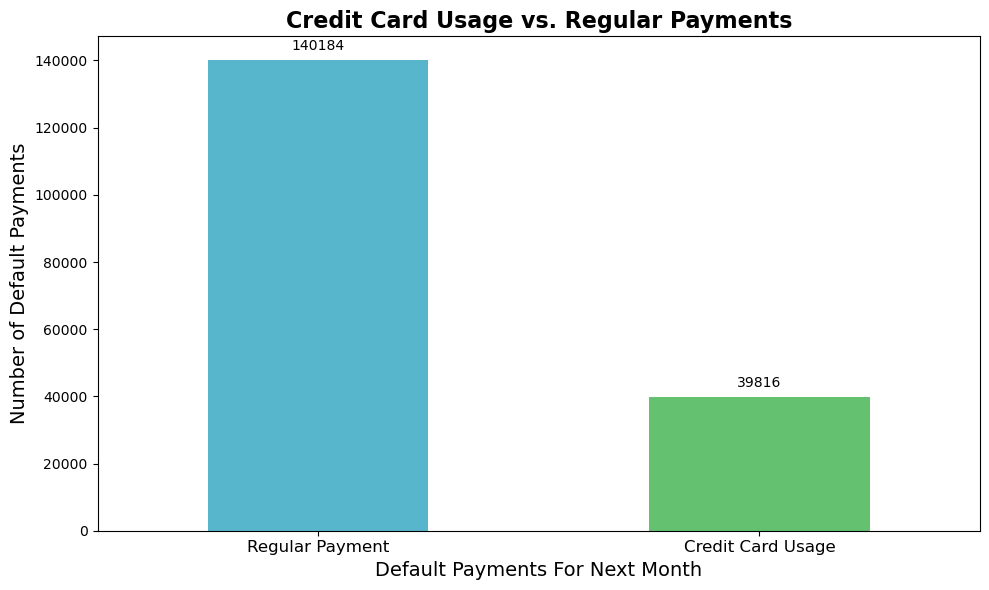

default_payment_next_month
0    77.88
1    22.12
Name: count, dtype: float64


In [132]:
# Count the occurrences of flight delays
default_counts = final_df['default_payment_next_month'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
ax = default_counts.plot(kind='bar', color=['#58B6CC','#63C170'])

# Add text annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
    
plt.xlabel('Default Payments For Next Month', fontsize=14)
plt.ylabel('Number of Default Payments', fontsize=14)
plt.title('Credit Card Usage vs. Regular Payments', fontsize=16, fontweight='bold')
plt.xticks(ticks=[0, 1], rotation=0, labels=['Regular Payment', 'Credit Card Usage'], ha='center', fontsize=12)  # Rotate x-axis labels for better visibility and define labels 
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

print((final_df['default_payment_next_month'].value_counts()/final_df.shape[0]) * 100)

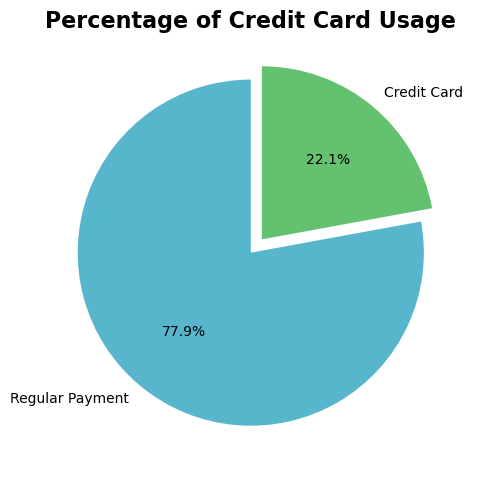

In [134]:
# Visualizing Delayed Flight Percentage

# Extract total number of regular payments and credit card payments
payment, creditCard = final_df['default_payment_next_month'].value_counts()

# Data and Labels
data = [payment, creditCard]
keys = ['Regular Payment', 'Credit Card']

# Pie Chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    data,
    labels=keys,
    autopct='%1.1f%%',
    startangle=90,
    explode=[0, 0.1], 
    colors=['#58B6CC','#63C170']
)

# Adjusting Figure Size
fig.set_size_inches(5, 5)

# Title and Layout Adjustments
plt.title('Percentage of Credit Card Usage', fontsize=16, fontweight='bold')
plt.tight_layout()

# Display the plot
plt.show()

The following dataset clearly shows imbalance that we will take care off later. 

## Week 2 & 3: Feature Engineering and Model Selection

## Week 4: Deployment